## Data preprocessing

In [1]:
import numpy as np
import pandas as pd
import my_functions
from matplotlib import pyplot
from PIL import Image

#### Original data:

In [2]:
%%bash
ls /home/artur/STL10/STL10_Original_dataset

class_names.txt
fold_indices.txt
test_X.bin
test_y.bin
train_X.bin
train_y.bin
unlabeled_X.bin


#### Original data load:

In [3]:
def read_labels(path_to_labels):

    # path to the binary file containing labels from the STL-10 dataset
    # returns an array containing the labels
    # author: Martin Tutek (function generally available)
    
    with open(path_to_labels, 'rb') as f:
        labels = np.fromfile(f, dtype=np.uint8)
        return labels


In [4]:
def read_images(path_to_data):
    
    # path to the binary file containing the binary images from the STL-10 dataset
    # returns an array containing all the images
    # author: Martin Tutek (function generally available)

    with open(path_to_data, 'rb') as f:
        # read whole file in uint8 chunks
        everything = np.fromfile(f, dtype=np.uint8)

        # We force the data into 3x96x96 chunks, since the
        # images are stored in "column-major order", meaning
        # that "the first 96*96 values are the red channel,
        # the next 96*96 are green, and the last are blue."
        # The -1 is since the size of the pictures depends
        # on the input file, and this way numpy determines
        # the size on its own.

        images = np.reshape(everything, (-1, 3, 96, 96)) #TensorFLow
        
        #images = np.reshape(everything, (-1, 96, 96, 3)) #Theano

        # Now transpose the images into a standard image format
        # readable by, for example, matplotlib.imshow
        # You might want to comment this line or reverse the shuffle
        # if you will use a learning algorithm like CNN, since they like
        # their channels separated.
        images = np.transpose(images, (0, 3, 2, 1))
        return images

In [5]:
ORIGINAL_TRAIN_IMAGES_PATH = '/home/artur/STL10/STL10_Original_dataset/train_X.bin'
ORIGINAL_TRAIN_LABELS_PATH = '/home/artur/STL10/STL10_Original_dataset/train_y.bin'
ORIGINAL_TEST_IMAGES_PATH = '/home/artur/STL10/STL10_Original_dataset/test_X.bin'
ORIGINAL_TEST_LABELS_PATH = '/home/artur/STL10/STL10_Original_dataset/test_y.bin'

ORIGINAL_TRAIN_IMAGES = read_images(ORIGINAL_TRAIN_IMAGES_PATH)
ORIGINAL_TRAIN_LABELS = read_labels(ORIGINAL_TRAIN_LABELS_PATH)
ORIGINAL_TEST_IMAGES = read_images(ORIGINAL_TEST_IMAGES_PATH)
ORIGINAL_TEST_LABELS = read_labels(ORIGINAL_TEST_LABELS_PATH)

#### Data research / recognition:

In [6]:
type(ORIGINAL_TRAIN_IMAGES)

numpy.ndarray

In [7]:
ORIGINAL_TRAIN_IMAGES.shape

(5000, 96, 96, 3)

In [8]:
type(ORIGINAL_TRAIN_LABELS)

numpy.ndarray

In [9]:
ORIGINAL_TRAIN_LABELS.shape

(5000,)

In [10]:
type(ORIGINAL_TEST_IMAGES)

numpy.ndarray

In [11]:
ORIGINAL_TEST_IMAGES.shape

(8000, 96, 96, 3)

In [12]:
type(ORIGINAL_TEST_LABELS)

numpy.ndarray

In [13]:
ORIGINAL_TEST_LABELS.shape

(8000,)

Summary:

In [14]:
# as validation sets do not exist generating the 'dummy' ones as function arguments only:

VALID_X = np.full((100,96,96,3), np.NaN)  
VALID_Y = np.full((100,), np.NaN)

pd.DataFrame(my_functions.data_description(ORIGINAL_TRAIN_IMAGES, ORIGINAL_TRAIN_LABELS, 
                                           VALID_X, VALID_Y, 
                                           ORIGINAL_TEST_IMAGES, ORIGINAL_TEST_LABELS, convert=False))

# convert=False to show the data info once only 

,set name,shape,dtype,data sight
0,TRAIN_X,"(5000, 96, 96, 3)",uint8,"[196, 196, 196]"
1,TRAIN_Y,"(5000,)",uint8,9
2,VALID_X,"(100, 96, 96, 3)",float64,"[nan, nan, nan]"
3,VALID_Y,"(100,)",float64,NaN
4,TEST_X,"(8000, 96, 96, 3)",uint8,"[160, 174, 186]"
5,TEST_Y,"(8000,)",uint8,7


#### Investigation which classes are there:

In [15]:
ORIGINAL_TRAIN_LABELS[0:100]

array([ 2,  6,  2,  7,  4, 10,  8,  5,  6,  9,  1,  7,  1,  9,  8,  7,  5,
        7,  3,  3,  2,  2,  7,  3,  2,  9,  6,  2,  6,  6,  1,  1,  1,  2,
        4,  7,  8,  3,  2,  4,  2,  7,  2,  4,  8,  5,  4,  1,  7,  8,  7,
        6,  9,  1,  7,  2,  4,  7,  9,  3,  3, 10, 10,  6,  2,  8,  9,  8,
        9,  9, 10,  1,  6,  1,  3,  6,  6,  8,  9, 10,  6,  1,  9,  4,  3,
       10,  7,  6,  9,  4,  8, 10,  7,  7,  7,  2,  1,  6,  1,  6],
      dtype=uint8)

In [16]:
ORIGINAL_TEST_LABELS[0:100]

array([ 7,  8,  6,  1,  4,  2,  2,  2,  5,  5,  1,  1,  5,  1,  2,  6,  5,
       10,  1,  7,  6,  4,  2,  4,  3,  7,  6,  6,  3,  8,  2,  7,  4,  8,
       10,  3,  5,  8, 10,  6,  2, 10,  1,  7,  5, 10,  2,  2,  4,  3,  6,
        5,  1,  1, 10,  9,  7,  8,  3,  1,  1,  2,  2,  8, 10,  7,  2,  9,
        1,  5,  3,  2,  8,  2,  3,  8,  6,  4,  6,  8,  4,  1, 10,  4,  1,
        2,  9,  1,  3,  6,  5,  2,  4,  7,  6,  2,  8,  6,  9,  6],
      dtype=uint8)

In [17]:
np.sort(np.unique(ORIGINAL_TRAIN_LABELS))

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8)

In [18]:
np.sort(np.unique(ORIGINAL_TEST_LABELS))

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8)

In [19]:
ORIGINAL_TRAIN_LABELS[0]

2

In [20]:
j = np.where(ORIGINAL_TRAIN_LABELS == 5)
j[0][0:50]

array([  7,  16,  45, 107, 109, 112, 116, 117, 131, 137, 168, 181, 184,
       185, 187, 188, 196, 201, 209, 224, 232, 233, 237, 251, 254, 258,
       265, 269, 272, 278, 284, 288, 293, 297, 323, 337, 359, 362, 376,
       382, 388, 394, 402, 410, 434, 486, 492, 499, 534, 544])

In [21]:
j[0][0]

7

In [22]:
ORIGINAL_TRAIN_IMAGES[j[0][0]].shape

(96, 96, 3)

In [23]:
ORIGINAL_TRAIN_LABELS[0:20]

array([ 2,  6,  2,  7,  4, 10,  8,  5,  6,  9,  1,  7,  1,  9,  8,  7,  5,
        7,  3,  3], dtype=uint8)

Class  1


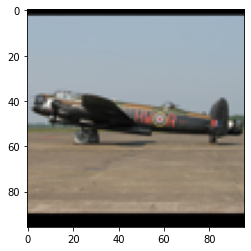

Class  2


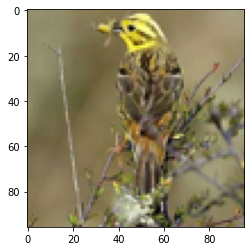

Class  3


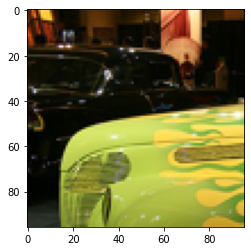

Class  4


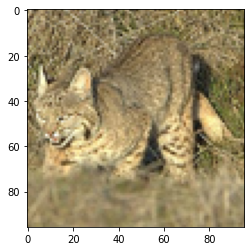

Class  5


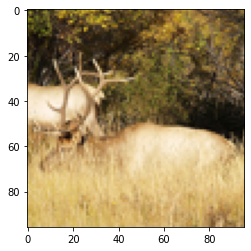

Class  6


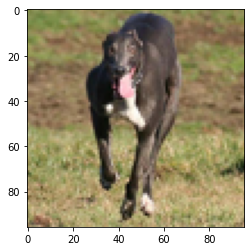

Class  7


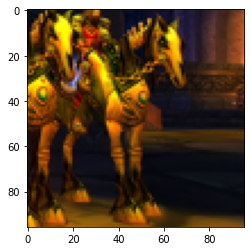

Class  8


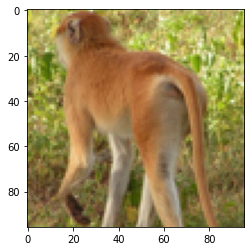

Class  9


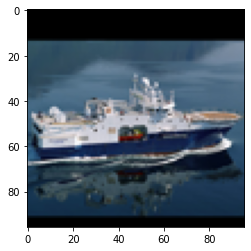

Class  10


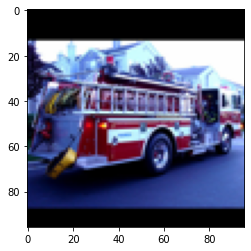

In [24]:
for i in range(1, 11):
    j = np.where(ORIGINAL_TRAIN_LABELS == i)
    print('Class ', i) 
    
    pyplot.imshow(Image.fromarray(ORIGINAL_TRAIN_IMAGES[j[0][0]]))
    pyplot.show()
     

#### Conclusion: 
* there are 10 classes,
* planes represents class 1
* birds represents class 2

## Data set reorganization
* Goal: from all available labelled data to get Train, Valid and Test sets containing planes and birds only

#### Joining of the ORIGINAL_TRAIN_IMAGES / LABELS and ORIGINAL_TEST_IMAGES  / LABELS into one set:

In [25]:
ALL_IMAGES = np.vstack((ORIGINAL_TRAIN_IMAGES, ORIGINAL_TEST_IMAGES))

In [26]:
ALL_IMAGES.shape

(13000, 96, 96, 3)

In [27]:
ALL_LABELS = np.concatenate((ORIGINAL_TRAIN_LABELS, ORIGINAL_TEST_LABELS))

In [28]:
ALL_LABELS.shape

(13000,)

#### Removing of the all data not belonging to classes 'planes' or 'birds':

In [29]:
# Indices of the classes different from 1 and 2  (in LABELS)

INDICES = np.where((ALL_LABELS!=(1)) & (ALL_LABELS!=(2)))  

# Indices of the labels to be removed - examples' preview
             
INDICES[0][0:50]

array([ 1,  3,  4,  5,  6,  7,  8,  9, 11, 13, 14, 15, 16, 17, 18, 19, 22,
       23, 25, 26, 28, 29, 34, 35, 36, 37, 39, 41, 43, 44, 45, 46, 48, 49,
       50, 51, 52, 54, 56, 57, 58, 59, 60, 61, 62, 63, 65, 66, 67, 68])

In [30]:
# Labels to be removed - examples' preview

ALL_LABELS[INDICES[0][0:50]]

array([ 6,  7,  4, 10,  8,  5,  6,  9,  7,  9,  8,  7,  5,  7,  3,  3,  7,
        3,  9,  6,  6,  6,  4,  7,  8,  3,  4,  7,  4,  8,  5,  4,  7,  8,
        7,  6,  9,  7,  4,  7,  9,  3,  3, 10, 10,  6,  8,  9,  8,  9],
      dtype=uint8)

- Verification OK (labels 1 and 2 not visible in preview as above)

In [31]:
ALL_IMAGES = np.delete(ALL_IMAGES, INDICES, axis=0)   # removing of not needed images from ALL_IMAGES
ALL_LABELS = np.delete(ALL_LABELS, INDICES, axis=0)   # removing of not needed labels from ALL_LABELS

In [32]:
ALL_IMAGES.shape

(2600, 96, 96, 3)

In [33]:
ALL_LABELS.shape

(2600,)

- Result - dataset of 2600 labelled images with planes and birds only

#### Division of 2600 images dataset into train (1600 images), valid (500 images) and test (500 images) datasets

In [34]:
TRAIN_IMAGES = ALL_IMAGES[0:1600]
TRAIN_IMAGES.shape

(1600, 96, 96, 3)

In [35]:
VALID_IMAGES = ALL_IMAGES[1600:2100]
VALID_IMAGES.shape

(500, 96, 96, 3)

In [36]:
TEST_IMAGES = ALL_IMAGES[2100:]
TEST_IMAGES.shape

(500, 96, 96, 3)

In [37]:
TRAIN_LABELS = ALL_LABELS[0:1600]
TRAIN_LABELS[0:100]

array([2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1,
       2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1,
       1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2,
       2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1], dtype=uint8)

In [38]:
VALID_LABELS = ALL_LABELS[1600:2100]
VALID_LABELS[0:100]

array([2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1,
       2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1], dtype=uint8)

In [39]:
TEST_LABELS = ALL_LABELS[2100:]
TEST_LABELS[0:100]

array([2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1,
       2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2,
       2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1,
       2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2,
       2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1], dtype=uint8)

- Looks like OK

#### Preview of images' examples in each set;
(9 first images in each set)


TRAIN images examples: 


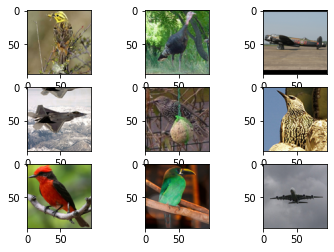


VALID images examples: 


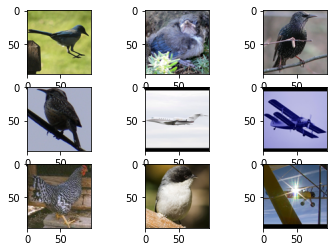


TEST images examples: 


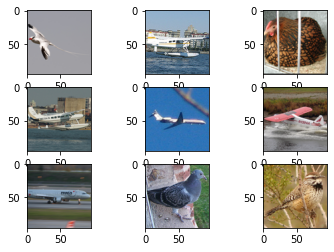

In [40]:
set_names = ['TRAIN images examples: ', 'VALID images examples: ', 'TEST images examples: ']
img_sets = [TRAIN_IMAGES, VALID_IMAGES, TEST_IMAGES]

for i in range(3):
    
    print()
    print(set_names[i])

    for j in range(0, 9):
        pyplot.subplot(330 + 1 + j)
        pyplot.imshow(Image.fromarray(img_sets[i][j]))

    pyplot.show()    
 

#### Data sets' saving:

In [41]:
# 1600 / 500 / 500 - uint8

np.save('./Used_data/TRAIN_IMAGES', TRAIN_IMAGES)
np.save('./Used_data/TRAIN_LABELS', TRAIN_LABELS)
np.save('./Used_data/VALID_IMAGES', VALID_IMAGES)
np.save('./Used_data/VALID_LABELS', VALID_LABELS)
np.save('./Used_data/TEST_IMAGES', TEST_IMAGES)
np.save('./Used_data/TEST_LABELS', TEST_LABELS)

### Summary:

#### Original data:

In [42]:
%%bash
ls /home/artur/STL10/STL10_Original_dataset

class_names.txt
fold_indices.txt
test_X.bin
test_y.bin
train_X.bin
train_y.bin
unlabeled_X.bin


In [43]:
print('ORIGINAL_TRAIN_IMAGES.shape -> ', ORIGINAL_TRAIN_IMAGES.shape,'\n',
      'ORIGINAL_TRAIN_LABELS.shape -> ', ORIGINAL_TRAIN_LABELS.shape,'\n',
      'ORIGINAL_TEST_IMAGES.shape -> ', ORIGINAL_TEST_IMAGES.shape,'\n',
      'ORIGINAL_TEST_LABELS.shape -> ', ORIGINAL_TEST_LABELS.shape)


ORIGINAL_TRAIN_IMAGES.shape ->  (5000, 96, 96, 3) 
 ORIGINAL_TRAIN_LABELS.shape ->  (5000,) 
 ORIGINAL_TEST_IMAGES.shape ->  (8000, 96, 96, 3) 
 ORIGINAL_TEST_LABELS.shape ->  (8000,)


#### Data after preprocessing:

In [44]:
%%bash
ls ./Used_data

TEST_IMAGES.npy
TEST_LABELS.npy
TRAIN_IMAGES.npy
TRAIN_LABELS.npy
VALID_IMAGES.npy
VALID_LABELS.npy


In [45]:
pd.DataFrame(my_functions.data_description(TRAIN_IMAGES, TRAIN_LABELS, 
                                           VALID_IMAGES, VALID_LABELS, 
                                           TEST_IMAGES, TEST_LABELS, convert=False))

# convert=False to show the data info once only 

,set name,shape,dtype,data sight
0,TRAIN_X,"(1600, 96, 96, 3)",uint8,"[87, 73, 37]"
1,TRAIN_Y,"(1600,)",uint8,2
2,VALID_X,"(500, 96, 96, 3)",uint8,"[204, 205, 210]"
3,VALID_Y,"(500,)",uint8,1
4,TEST_X,"(500, 96, 96, 3)",uint8,"[132, 167, 203]"
5,TEST_Y,"(500,)",uint8,1
